In [103]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [104]:
#Load the Dataset
df=pd.read_csv('insurance data.csv')
pd.set_option('display.max_columns', None)
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,45.0,male,28.700,2.0,no,32993.77432,16.0,902022.0,8.640895e+06,1.0,9.436591e+07,southwest,8027.96800
1,64.0,male,34.500,0.0,no,38448.37757,8.0,956604.0,1.102239e+07,1.0,2.300219e+08,southwest,13822.80300
2,19.0,female,32.110,0.0,no,50778.14448,15.0,758688.0,1.642626e+06,0.0,4.644349e+07,northwest,2130.67590
3,36.0,male,28.880,3.0,no,33741.00388,10.0,879560.0,1.985637e+06,1.0,1.306169e+08,northeast,6748.59120
4,19.0,female,24.605,1.0,no,12198.20493,16.0,793026.0,1.000938e+07,1.0,6.113392e+07,northwest,2709.24395


## Exploratory Data Analysis (EDA)

In [105]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (10008, 13)


It has 10008 rows and 13 columns

In [106]:
# Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              9935 non-null   float64
 1   sex                              10008 non-null  object 
 2   bmi                              9984 non-null   float64
 3   children                         9963 non-null   float64
 4   smoker                           10008 non-null  object 
 5   Claim_Amount                     9909 non-null   float64
 6   past_consultations               9957 non-null   float64
 7   num_of_steps                     9984 non-null   float64
 8   Hospital_expenditure             9978 non-null   float64
 9   NUmber_of_past_hospitalizations  9998 non-null   float64
 10  Anual_Salary                     9971 non-null   float64
 11  region                           10008 non-null  object 
 12  charges           

It has categorical datatypes are sex,smoker,region and others are float datatype

In [107]:
# Null Values
print(df.isnull().sum())


age                                73
sex                                 0
bmi                                24
children                           45
smoker                              0
Claim_Amount                       99
past_consultations                 51
num_of_steps                       24
Hospital_expenditure               30
NUmber_of_past_hospitalizations    10
Anual_Salary                       37
region                              0
charges                             0
dtype: int64


few missing are present but we handle later

In [108]:
df.duplicated().sum()

8674

In [109]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['sex', 'smoker', 'region']

In [110]:
numerical_features

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [111]:
# Check for duplicates
df = df.drop_duplicates()

In [112]:
# Descriptive Statistics
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1325.000000,1331.000000,1329.000000,1320.000000,1328.000000,1.331000e+03,1.330000e+03,1332.000000,1.328000e+03,1334.000000
mean,39.264906,30.654865,1.091046,33301.844859,15.193524,9.095986e+05,1.570118e+07,1.057808,3.664836e+08,13199.928800
std,14.026034,6.103963,1.203028,15591.740292,7.459777,9.171151e+04,2.654302e+07,0.531890,5.637526e+08,12050.929185
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.255000,0.000000,20714.823863,9.000000,8.470170e+05,4.062837e+06,1.000000,7.699258e+07,4724.369462
50%,39.000000,30.360000,1.000000,33669.769220,15.000000,9.139980e+05,7.475057e+06,1.000000,1.414117e+08,9333.014350
75%,51.000000,34.600000,2.000000,45034.277002,20.000000,9.708355e+05,1.080299e+07,1.000000,3.205344e+08,16454.504562
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


dataset is clean and free of duplicates , there is not much different in statistics before and after removal of duplicates


In [113]:
df.shape

(1334, 13)

In [114]:
# for checking the names of columns
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [115]:
# Identify outliers using the IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']

outliers = {feature: identify_outliers(df, feature) for feature in numerical_features}
for feature, outlier_data in outliers.items():
    print(f"Number of outliers in {feature}: {outlier_data.shape[0]}")


Number of outliers in age: 0
Number of outliers in bmi: 9
Number of outliers in children: 0
Number of outliers in Claim_Amount: 0
Number of outliers in past_consultations: 5
Number of outliers in num_of_steps: 0
Number of outliers in Hospital_expenditure: 198
Number of outliers in NUmber_of_past_hospitalizations: 375
Number of outliers in Anual_Salary: 195
Number of outliers in charges: 142


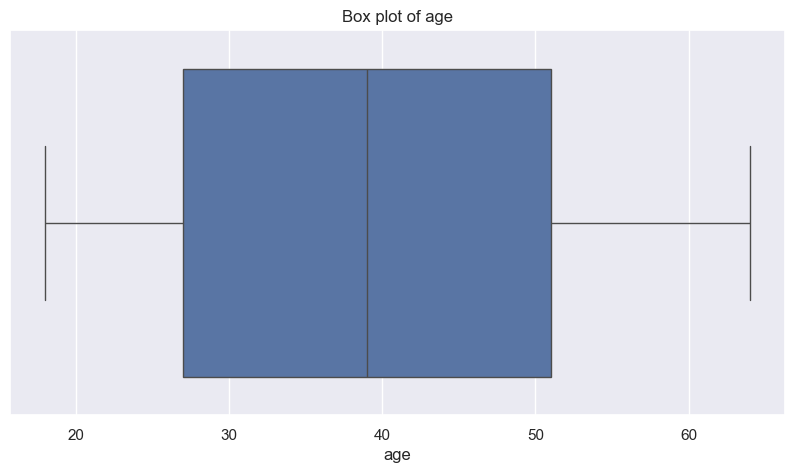

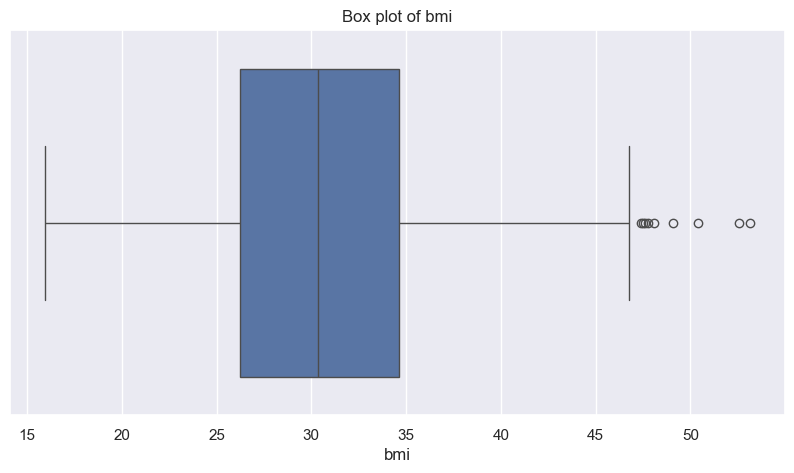

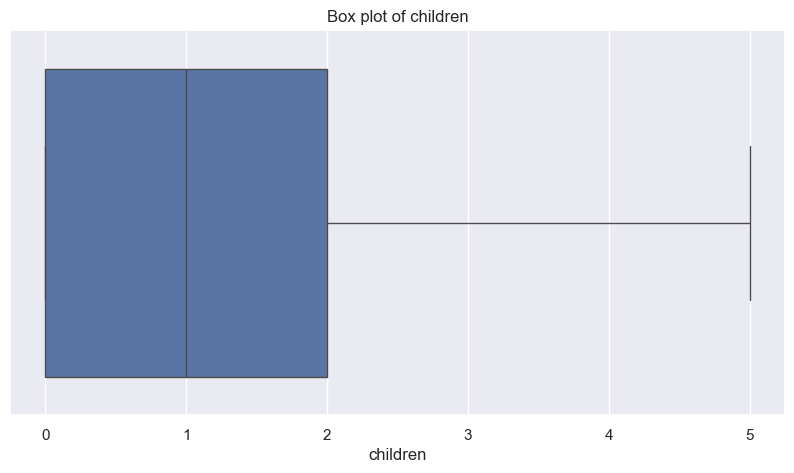

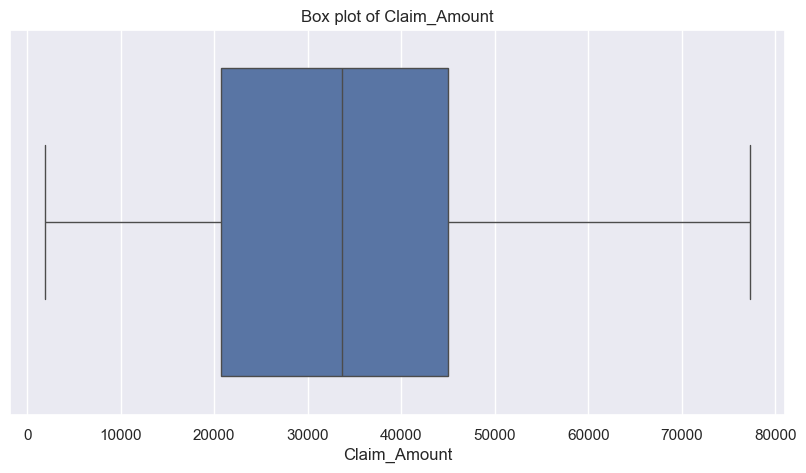

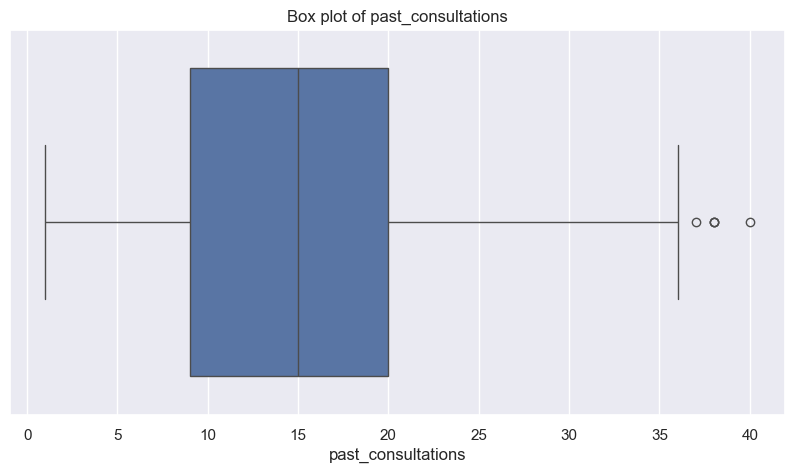

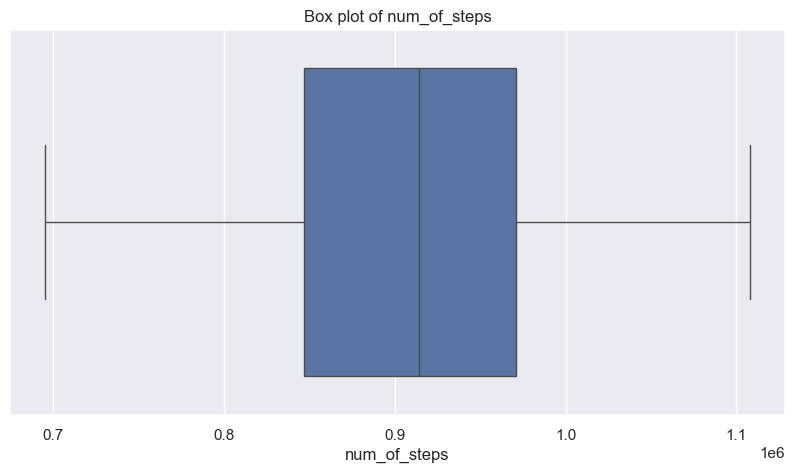

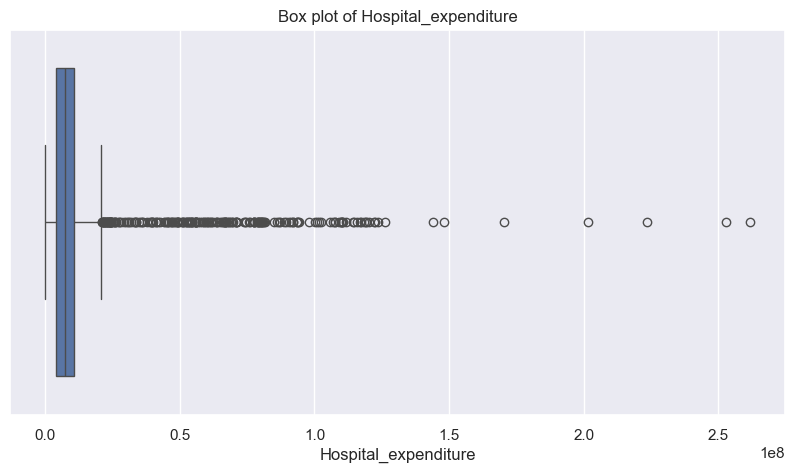

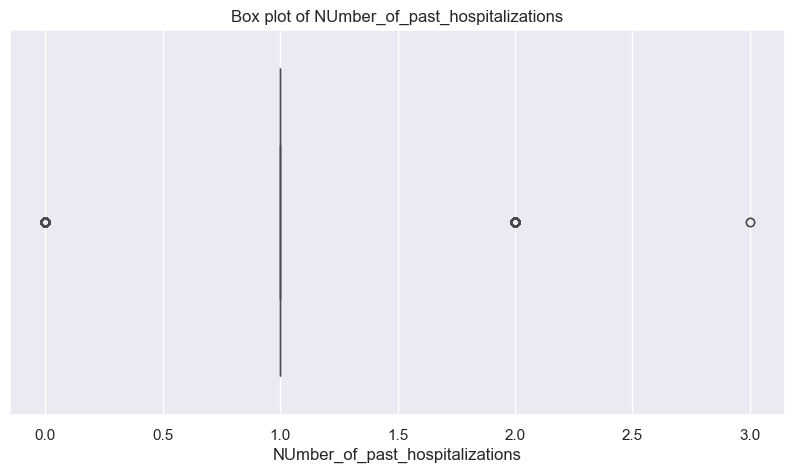

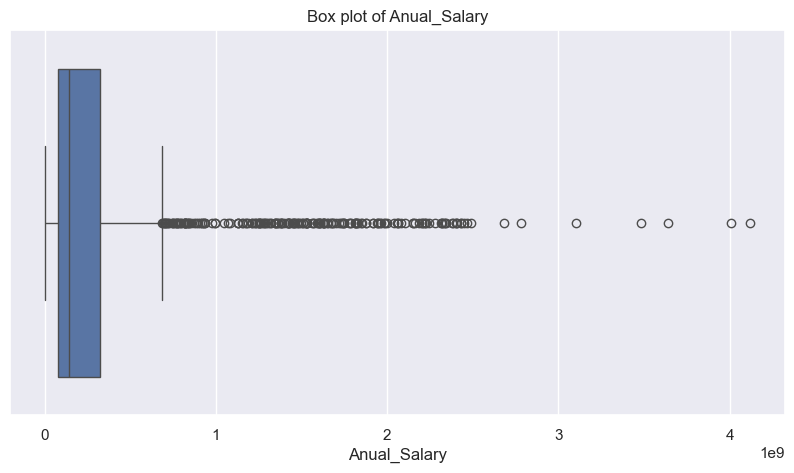

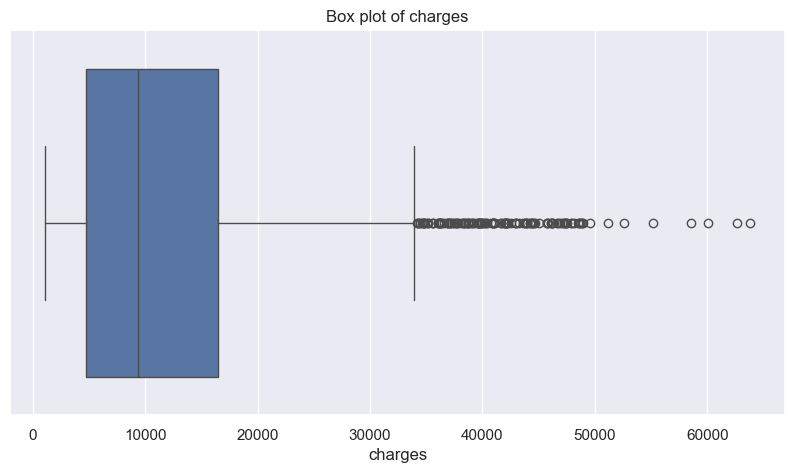

In [116]:
# Visualize outliers using box plots

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()


In [117]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'region' variable:",end=" " )
print(df['region'].unique())



Categories in 'sex' variable:      ['male' 'female']
Categories in 'smoker' variable:   ['no' 'yes']
Categories in'region' variable: ['southwest' 'northwest' 'northeast' 'southeast']


In [118]:
# Capping
# Remove outliers using Capping method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for feature in numerical_features:
    df = remove_outliers(df, feature)

print(f"Shape of dataset after removing outliers: {df.shape}")


Shape of dataset after removing outliers: (926, 13)


In [119]:
df.shape

(926, 13)

##Visualize average score distribution to make some conclusion.
* Histogram

* Kernel Distribution Function (KDE)

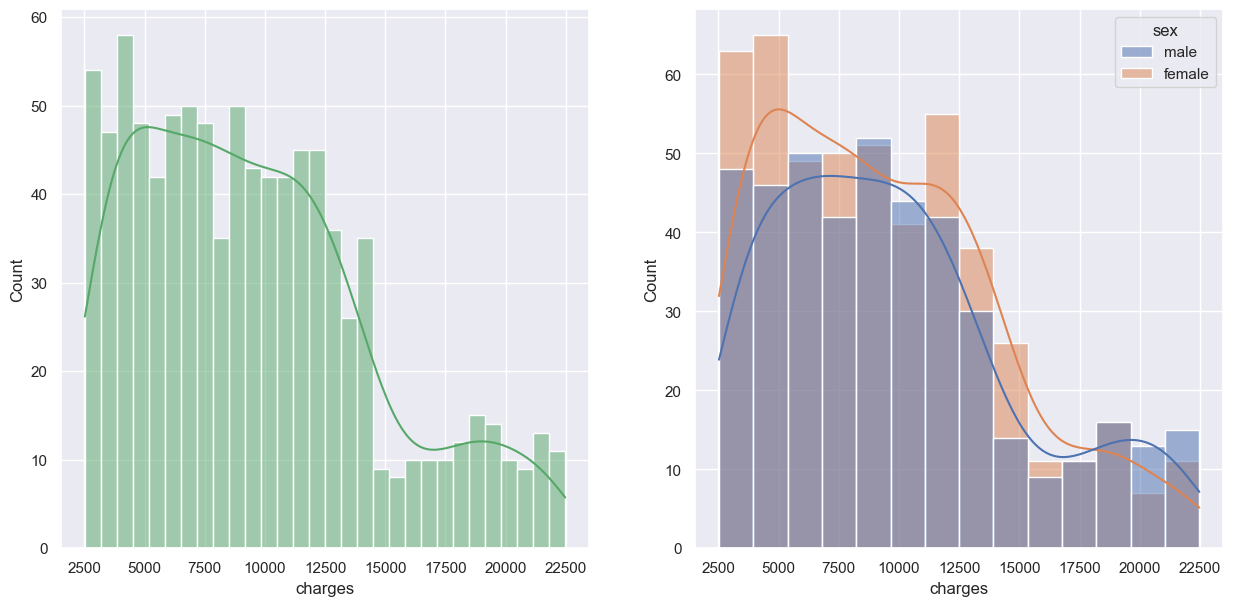

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='sex')
plt.show()

the charges for female are more than charges of male


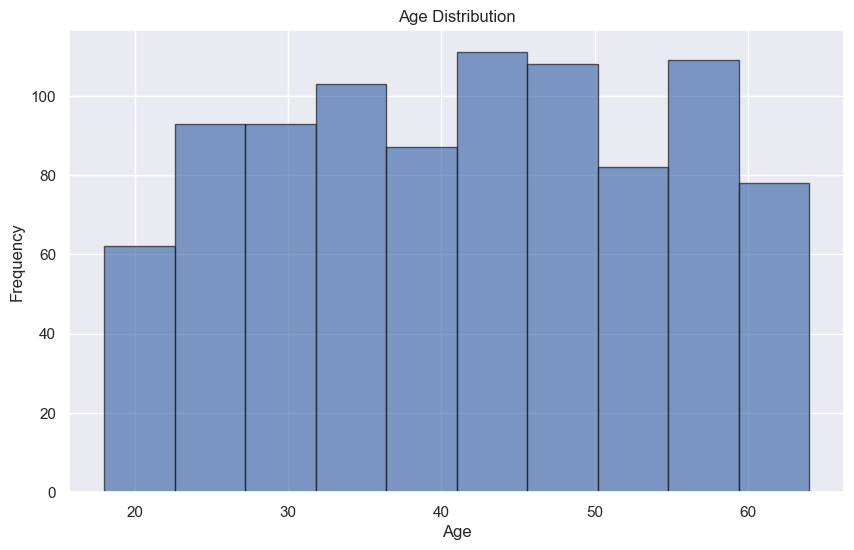

In [121]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


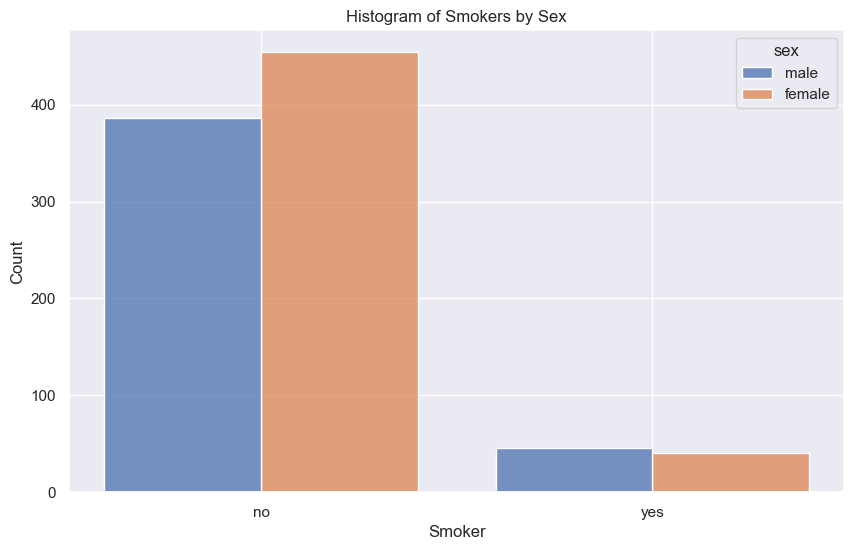

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='smoker', hue='sex', multiple='dodge', shrink=0.8)
plt.title('Histogram of Smokers by Sex')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7676\3568876437.py:5: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



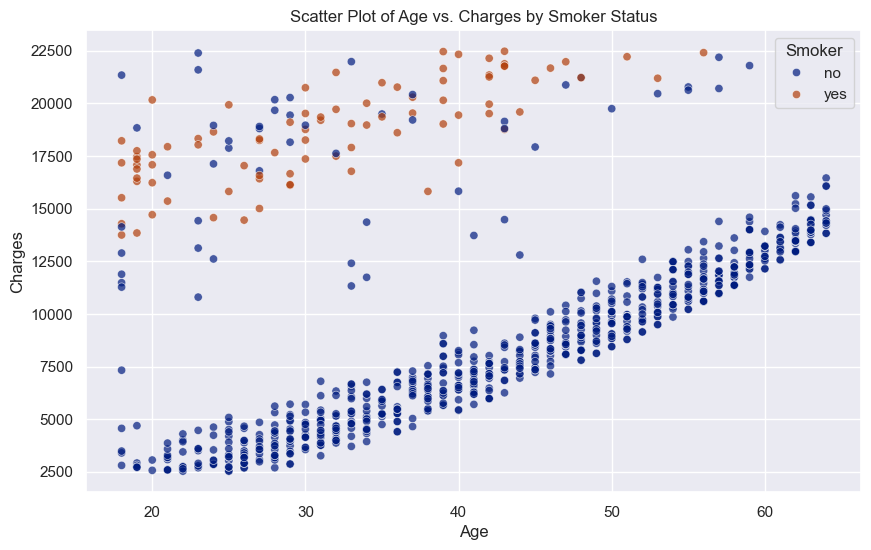

In [123]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
palette = sns.color_palette("dark", as_cmap=False)

sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette=palette, alpha=0.7)
plt.title('Scatter Plot of Age vs. Charges by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

This graph shows that the person who smokes have high charges compared to non smokers

In [ ]:
import plotly.express as px
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='bmi vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.violin(df,
                 x='region',
                 y='charges',
                 color='smoker',
                 title='region vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

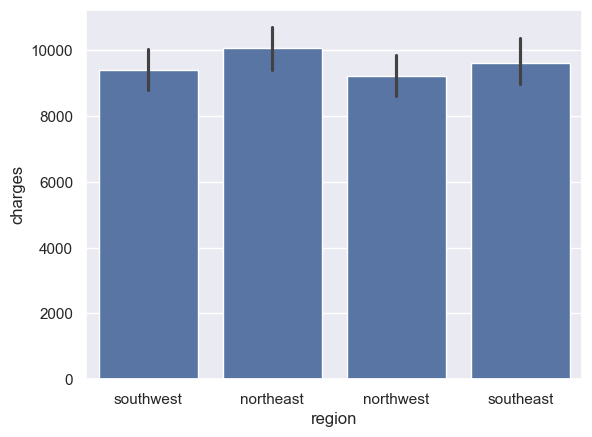

In [ ]:
sns.barplot(data=df, x='region', y='charges');

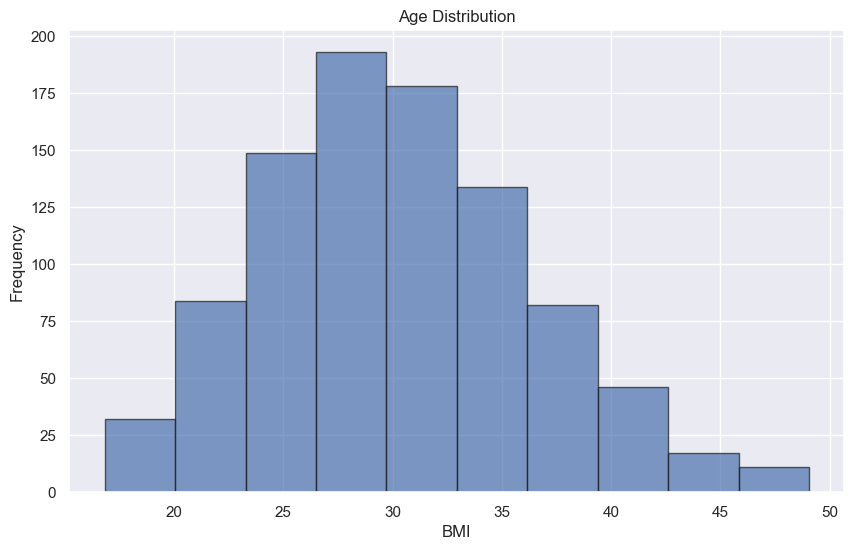

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df,
                 x='Anual_Salary',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='bmi vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

This graph shows that the high annual salary are high chances are be smokers and have high charges

## Feature Engineering

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

print("\nDataFrame after Label Encoding:")
df.head()



DataFrame after Label Encoding:


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,45.0,1,28.700,2.0,0,32993.77432,16.0,902022.0,8.640895e+06,1.0,9.436591e+07,3,8027.96800
1,64.0,1,34.500,0.0,0,38448.37757,8.0,956604.0,1.102239e+07,1.0,2.300219e+08,3,13822.80300
3,36.0,1,28.880,3.0,0,33741.00388,10.0,879560.0,1.985637e+06,1.0,1.306169e+08,0,6748.59120
4,19.0,0,24.605,1.0,0,12198.20493,16.0,793026.0,1.000938e+07,1.0,6.113392e+07,1,2709.24395
5,34.0,1,34.210,0.0,0,30783.69237,5.0,831945.0,9.076816e+06,1.0,1.011024e+08,2,3935.17990


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

features=['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'Anual_Salary', 'region']

# Apply Min-Max scaling
df[features] = scaler.fit_transform(df[features])

print(" after Min-Max Scaling:")
df.head()


 after Min-Max Scaling:


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,0.586957,1.0,0.368584,0.4,0.0,0.513224,0.538462,0.546587,0.406839,1.0,0.150077,1.000000,8027.96800
1,1.000000,1.0,0.548457,0.0,0.0,0.609012,0.230769,0.771295,0.519720,1.0,0.386486,1.000000,13822.80300
3,0.391304,1.0,0.374167,0.6,0.0,0.526346,0.307692,0.454113,0.091385,1.0,0.213252,0.000000,6748.59120
4,0.021739,0.0,0.241588,0.2,0.0,0.148032,0.538462,0.097863,0.471704,1.0,0.092163,0.333333,2709.24395
5,0.347826,1.0,0.539463,0.0,0.0,0.474412,0.115385,0.258088,0.427502,1.0,0.161817,0.666667,3935.17990


##Feature Selection

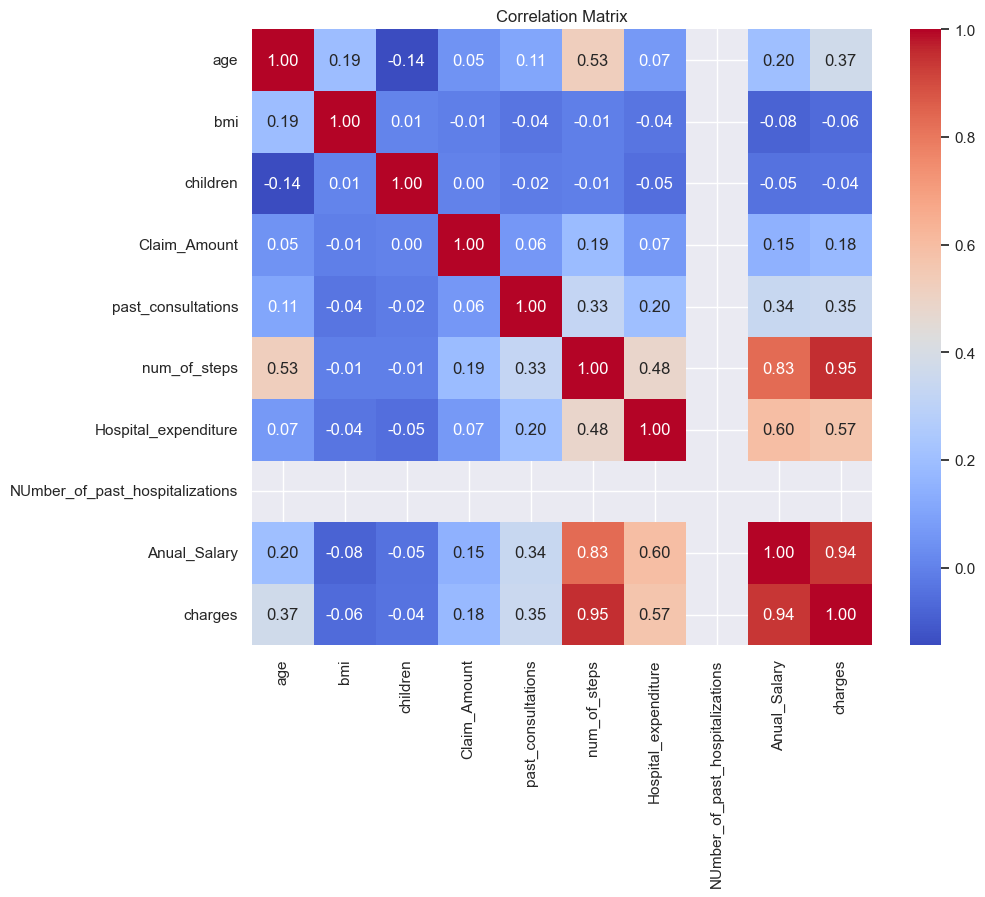

In [ ]:
df_numerical = df[numerical_features]

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


It has strong positive correlation with num of steps and annual salary

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_features = ['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
                      'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
                      'Anual_Salary']
df_numerical = df[numerical_features]
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]

# Print the VIF values
print(vif_data)


                           Feature        VIF
0                              age   2.068113
1                              bmi   1.060249
2                         children   1.067997
3                     Claim_Amount   1.043618
4               past_consultations   1.139414
5                     num_of_steps   6.277701
6             Hospital_expenditure   1.566775
7  NUmber_of_past_hospitalizations  19.501048
8                     Anual_Salary   5.153685


In [ ]:
# Dropping the num of steps feature to avoid multicollinearity problem
df.drop(['num_of_steps'],axis=1,inplace=True)

In [ ]:
df.to_csv('insurance_model.csv')